In [13]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

In [15]:
csv_url = r"C:\Users\GIA BAO\OneDrive - Trường ĐH CNTT - University of Information Technology\Vinamilk (1).csv"

In [16]:
data = pd.read_csv(csv_url, delimiter=';')
print(data)

            Date       Price        Open        High        Low      Vol  \
0     12/15/2023   68,100.00   68,500.00   68,600.00  68,100.00    3.74M   
1     12/14/2023   68,400.00   68,400.00   68,900.00  68,200.00    1.46M   
2     12/13/2023   68,200.00   69,600.00   69,700.00  68,100.00    4.51M   
3     12/12/2023   69,400.00   70,000.00   70,100.00  69,000.00    2.79M   
4     12/11/2023   70,000.00   70,500.00   70,500.00  69,900.00    4.73M   
...          ...         ...         ...         ...        ...      ...   
1724  01/20/2017  100,319.00   99,529.00  101,346.00  99,529.00    1.91M   
1725  01/19/2017   99,529.00   99,766.00   99,766.00  99,450.00    1.04M   
1726  01/18/2017   99,529.00   99,529.00   99,687.00  98,897.00    1.02M   
1727  01/17/2017   99,608.00  100,082.00  100,082.00  99,608.00  698.86K   
1728  01/16/2017   99,924.00  100,319.00  100,398.00  99,845.00  723.16K   

      Change  
0     -0.44%  
1      0.29%  
2     -1.73%  
3     -0.86%  
4      1.45%

In [17]:
# Convert the 'Date' column to datetime with the correct format
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
# Set the 'Date' column as the index
data.set_index('Date', inplace=True)

In [18]:
data.sort_values(by='Date', inplace=True)
print(data)

                 Price        Open        High        Low      Vol  Change
Date                                                                      
2017-01-16   99,924.00  100,319.00  100,398.00  99,845.00  723.16K  -0.32%
2017-01-17   99,608.00  100,082.00  100,082.00  99,608.00  698.86K  -0.32%
2017-01-18   99,529.00   99,529.00   99,687.00  98,897.00    1.02M  -0.08%
2017-01-19   99,529.00   99,766.00   99,766.00  99,450.00    1.04M   0.00%
2017-01-20  100,319.00   99,529.00  101,346.00  99,529.00    1.91M   0.79%
...                ...         ...         ...        ...      ...     ...
2023-12-11   70,000.00   70,500.00   70,500.00  69,900.00    4.73M   1.45%
2023-12-12   69,400.00   70,000.00   70,100.00  69,000.00    2.79M  -0.86%
2023-12-13   68,200.00   69,600.00   69,700.00  68,100.00    4.51M  -1.73%
2023-12-14   68,400.00   68,400.00   68,900.00  68,200.00    1.46M   0.29%
2023-12-15   68,100.00   68,500.00   68,600.00  68,100.00    3.74M  -0.44%

[1729 rows x 6 columns]


In [19]:
# Remove ',' and convert format
cols_to_convert = ['Price', 'Open', 'High', 'Low']
data[cols_to_convert] = data[cols_to_convert].replace(',', '', regex=True).astype(float)

# Convert the format of the "Vol" column
def convert_vol(value):
    if 'M' in value:
        return float(value.replace('M', '')) * 1e6
    elif 'K' in value:
        return float(value.replace('K', '')) * 1e3
    else:
        return float(value)

data['Vol'] = data['Vol'].apply(convert_vol)

# Convert the format of the "Change" column
data['Change'] = data['Change'].replace('%', '', regex=True).astype(float) / 100.0
print(data)

               Price      Open      High      Low        Vol  Change
Date                                                                
2017-01-16   99924.0  100319.0  100398.0  99845.0   723160.0 -0.0032
2017-01-17   99608.0  100082.0  100082.0  99608.0   698860.0 -0.0032
2017-01-18   99529.0   99529.0   99687.0  98897.0  1020000.0 -0.0008
2017-01-19   99529.0   99766.0   99766.0  99450.0  1040000.0  0.0000
2017-01-20  100319.0   99529.0  101346.0  99529.0  1910000.0  0.0079
...              ...       ...       ...      ...        ...     ...
2023-12-11   70000.0   70500.0   70500.0  69900.0  4730000.0  0.0145
2023-12-12   69400.0   70000.0   70100.0  69000.0  2790000.0 -0.0086
2023-12-13   68200.0   69600.0   69700.0  68100.0  4510000.0 -0.0173
2023-12-14   68400.0   68400.0   68900.0  68200.0  1460000.0  0.0029
2023-12-15   68100.0   68500.0   68600.0  68100.0  3740000.0 -0.0044

[1729 rows x 6 columns]


In [20]:
#Divide the data into Train-Test-Val sets with different ratios
def split_data(df, ratio):
    train, test_val = train_test_split(df, test_size=(1 - ratio[0]), shuffle=False)
    test, val = train_test_split(test_val, test_size=(ratio[2] / (ratio[1] + ratio[2])), shuffle=False)
    return train, test, val

#Ratio 6:3:1
train_data, test_data, val_data = split_data(data, [0.6, 0.3, 0.1])

In [21]:
features = ['Open', 'High', 'Low', 'Vol']
target = 'Price'
X_train, y_train = train_data[features], train_data[target]
X_test, y_test = test_data[features], test_data[target]
X_val, y_val = val_data[features], val_data[target]

In [22]:
#Training an SVR (Support Vector Regression) model
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

SVR()

In [23]:
#Evaluate the model on various datasets
def evaluate_model(model, X, y, name):
    y_pred = model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    mae = mean_absolute_error(y, y_pred)
    mape = np.mean(np.abs((y - y_pred) / y)) * 100

    print(f"{name} RMSE: {rmse:.2f}")
    print(f"{name} MAE: {mae:.2f}")
    print(f"{name} MAPE: {mape:.2f}")

#Evaluate the model on Train datasets 
evaluate_model(model, X_train, y_train, "Train")

#Evaluate the model on Test datasets 
evaluate_model(model, X_test, y_test, "Test")

#Evaluate the model on Val datasets 
evaluate_model(model, X_val, y_val, "Val")

Train RMSE: 24538.08
Train MAE: 16687.99
Train MAPE: 13.40
Test RMSE: 26387.72
Test MAE: 25621.70
Test MAPE: 33.82
Val RMSE: 31940.51
Val MAE: 31717.88
Val MAPE: 44.64


In [24]:
# Ensure last_data is defined
last_data = data.index[-1].strftime('%Y-%m-%d')

# Create X_next_30_days DataFrame
next_30_days = pd.date_range(last_data, periods=30, freq='B')
X_next_30_days = pd.DataFrame(index=next_30_days, columns=features)

# Make predictions for train, test, and val sets
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
y_pred_val = model.predict(X_val)

# Make predictions for the next 30 days
last_data = data.index[-1].strftime('%Y-%m-%d')
last_data = pd.to_datetime(last_data) + pd.DateOffset(days=1)
next_30_days = pd.date_range(last_data, periods=30, freq='B')
X_next_30_days = X_next_30_days.fillna(0)
y_next_30_days = model.predict(X_next_30_days)

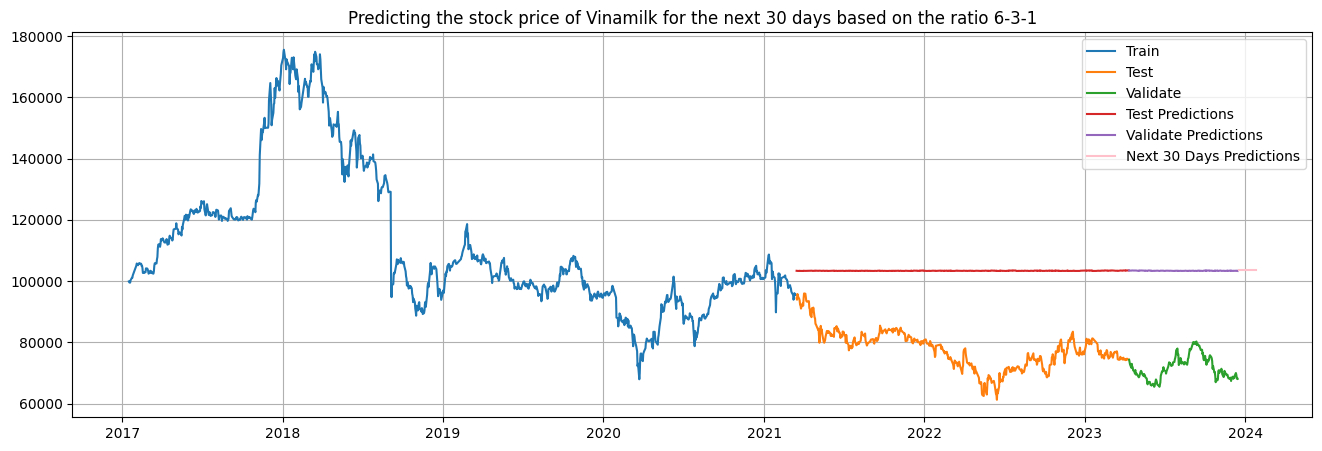

In [26]:
# Drawing plot
plt.figure(figsize=(16, 5))
plt.title("Predicting the stock price of Vinamilk for the next 30 days based on the ratio 6-3-1")
plt.grid(True)
plt.plot(train_data.index, y_train, label='Train')
plt.plot(test_data.index, y_test, label='Test')
plt.plot(val_data.index, y_val, label='Validate')
plt.plot(test_data.index, y_pred_test, label='Test Predictions')
plt.plot(val_data.index, y_pred_val, label='Validate Predictions')
plt.plot(next_30_days, y_next_30_days, color="pink", label='Next 30 Days Predictions')
plt.legend()
plt.show()